<a href="https://colab.research.google.com/github/TeerthaDeb/Advanced-Bank-Management/blob/main/Comp_432_Project_by_Maharaj_Teertha_Deb%2C_40227747.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the following, we report a template for the final project. Feel free to modify it to better fit your own project.

# **AI Exercise Trainer , Real-Time Posture Correction**

## **Abstract**
This project aims to help people maintain the correct posture while exercising by using Machine Learning. Many gym-goers struggle with proper form during workouts which can slow down progress and increase the risk of injury. Hiring a personal trainer is helpful but often very expensive. To solve this problem I built a machine learning model that monitors body movements during exercise and gives real-time feedback when the posture is incorrect.


The model uses pose estimation from videos to track body keypoints and detect where the user is breaking form. I used MediaPipe to extract these keypoints and trained a LSTM models to learn correct posture patterns. The system highlights which body part is misaligned and suggests how to fix it. For a starting point I selected bench press exercise, which is a struggling exercise for the new gym goers.


I tested the model on a dataset of 'bench_press' exercise videos and found that it can detect posture breaks with good accuracy. The feedback is clear and fast which helps users make corrections immediately. This project shows that Machine Learning modelds can be a useful and affordable gym partner who warns you everytime you break the right pose.

So I used LSTM model for this purpose after training and testing: the validation and test error is:
0.71 and 0.991 respectively, which is pretty accurate to guide user when they are breaking their bench press pose.

## **Introduction**


Maintaining the correct posture during exercise is a common challenge for many gym-goers. Poor posture can limit progress, increase the risk of injury, and reduce the effectiveness of workouts. While personal trainers can help improve posture, their services are often expensive and not accessible to everyone. This is where technology can play a crucial role, by offering an affordable and effective gym companion.


The problem is to create a system that can analyze exercise form in real time, detect when a person breaks their posture, and provide immediate feedback on how to correct it. This would help people stay in proper form, reduce injuries, and maximize the results of their workouts.


Previous approaches to exercise posture correction have primarily utilized computer vision techniques and machine learning models to analyse users' movements. For instance, some systems employ machine learning algorithms to recognize various exercise postures, achieving high accuracy in classification tasks. [This research for example](https://ieeexplore.ieee.org/document/10112726/authors#authors). However they do not correct user postire during exercise


Additionally, transformer-based models have been applied to 3D human pose estimation, capturing both spatial and temporal dependencies in human motion.
These methods have demonstrated promising results in understanding and evaluating human poses during physical activities. [This project for example](https://github.com/zczcwh/PoseFormer). But still being used for classifcation, not providing feedback to users pose during an exercise. Thus I decided to make a exercise correcting Machine learning model that provides feedback on realtime, and not does any classification.



For this task I Planned to use it as: take first 10 frames and then predict the 11th, then take 2 to 11th frame and predict the 12th frame and so on. Here frame means body points at the particular time.

To achive this LSTM model was a perfect fit for this type of task and so I used a LSTM model, trained the model on a dataset that includes only one exercise(bech press) in this context and then test it. However, Same model could be used for same task, just need to tweak the hyperparameters and which body landmarks to extarct.



For the dataset, it would be very hard for me if I had to create a datset for the task, luckily I found a kaggle video dataset that has trimmed videos for each exercise and I used becnh press exercise's videos for training this mode.



After Completing the model, the model corrects user poses like this:
image.png

and like this
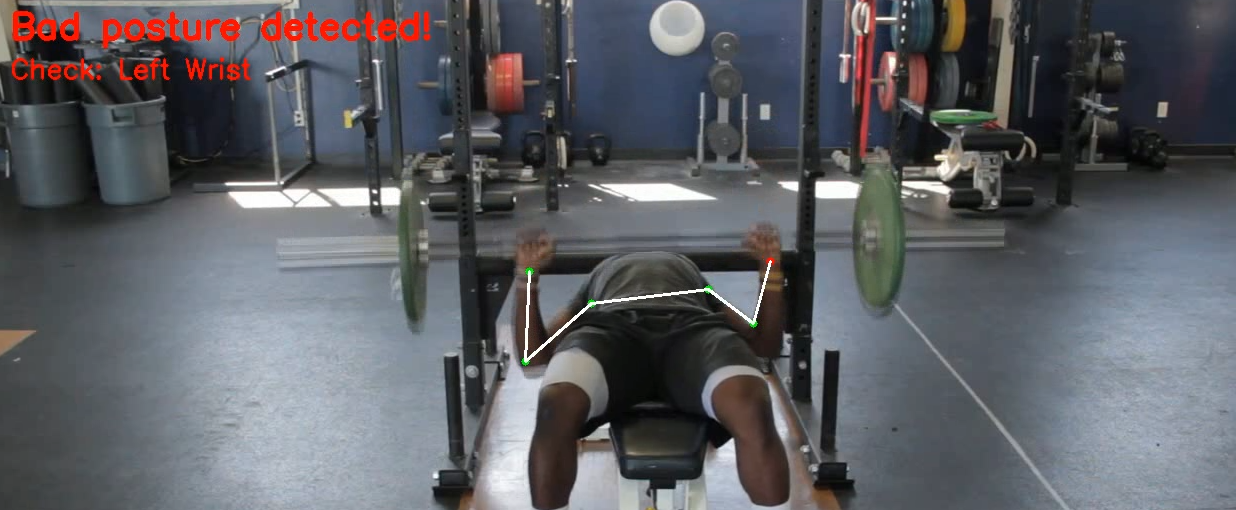

## **Methodology**
Most machine learning projects I found online focus on identifying which exercise is being performed. However, very few projects try to correct a user's posture in real time. I thought this would be the perfect opportunity to try something original for my COMP 432 machine learning class.

The first important step was to extract body keypoints from exercise videos. I used MediaPipe because it gives accurate body keypoints and also normalizes them automatically. This saved me a lot of time and effort. MediaPipe is also very fast, and when combined with libraries like OpenCV, it becomes a powerful tool for video processing. It gives 33 keypoints for the body across all three axes, which is perfect for understanding full body posture.

After extracting the keypoints from each video frame, I trained a model to learn the motion. The training method worked like a sliding window. For example, the model would look at 10 frames and try to predict the 11th. Then it would shift to frames 2 to 11 and predict the 12th, and so on. This helped the model learn the flow of motion during the exercise.

The LSTM model I used: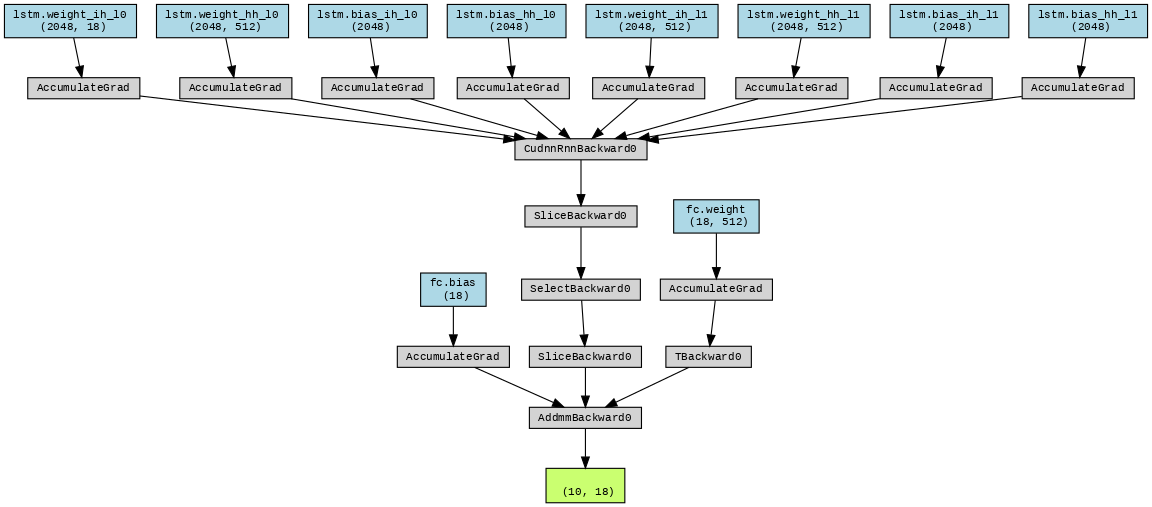


** model plotted using torch_viz



### Installing the libraries that are not in colab environment by default

This includes:
 * media pipe , (numpy version = 1.23.5 , as this is compatible with media pipe)

#### This section is a bit tricky to run.
*** Please follow the instruction to run:
  
  1) run the code..

  2) it will open a restart session box, PLEASE DO NOT RESTART UNTILL entire code has FINISHED running it will take 42s to complete.
  
  3) when the cell is done , click on restart and then run the next cell.
  
  4) Then normal run...

In [1]:
# A little bit tricky to go past this one as mediapipe is not native to colab. and the version makes some problem too.
# Steps to run:
#   1) run the code..
#   2) it will open a restart session box, PLEASE DO NOT RESTART untill entire code has finished running it will take 42s to complete.
#   3) when the cell is done , click on restart and then run the next cell.
#   4) Then normal run...

## Written this code with Google Gemini, that comes with colab environment,
# / Prompt : media pipe is not loading in colab env. How do I install it properly such that it does not conflict with numpy?

!pip install --upgrade pip
!pip uninstall -y protobuf mediapipe numpy
!pip install protobuf==5.26.1 numpy==1.23.5
!pip install mediapipe


# IMPORTANT : CLICK RETSART SESSION AFTER EVERYTHING WAS COMPLETED. and then continue run from the NEXT CELL, please DO NOT RUN THIS CELL AGAIN.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 117.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 132.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.1
    Uninstalling protobuf-5.26.1:
      Successfully uninstalled protobuf-5.26.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


**Just after clicking on restart session continue run from here**

*use shotcut: ctrl(or command for MAC) + F10*

Just to check if mediapipe was installed nicely, and do a version check..

In [1]:
import mediapipe as mp
print(mp.__version__)

0.10.21


### Import other libraries

In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from collections import deque
from IPython.display import display, Video

## **Experimental Setup**
Describe the datasets used for your experiments. List the machine learning techniques used to solve your problem and report the corresponding hyperparameters.

In this section, you can add **text**, **tables**, and **figures**.



Finding the right dataset for this type of machine learning model was very challenging. Most exercise videos on YouTube are full-length trainer videos where they talk about how to do the workout, show the correct form, and even show the wrong form. These videos are long and not directly usable. Trimming those videos manually to create a large dataset would have taken a lot of time and effort.

Luckily, I found a dataset on Kaggle:
https://www.kaggle.com/datasets/philosopher0808/gym-workoutexercises-video

This dataset has short trimmed videos for most exercises. I focused on the data_btc/bench_press directory, which contains several short clips of people doing the bench press. This was a good starting point for my project.

However, I noticed some problems with the dataset. There were duplicate videos, and some of the same videos appeared in both the train and test folders. Also, there was no validation set. To fix this, I cleaned the dataset by removing duplicate clips and separating the data properly. I also added some new videos by downloading clips from YouTube and trimming them using video editing tools. This helped me create a clean train, validation, and test split with no data leakage.



Techniques and Hyperparameters
I used the following approach for my model:


*   Pose extraction: MediaPipe with 33 body keypoints in 3D
*   Preprocessing: Extract keypoints for each frame, the points were normalized before, so I did not need to normalize them.

*   Model type: LSTM (Long Short-Term Memory)

**Dataset** :
*  Train Videos: 51 , roughly(80%)
*  Validation Videos : 6 , roughly(10%)
*  Test Videos : 6 , roughly(10%)

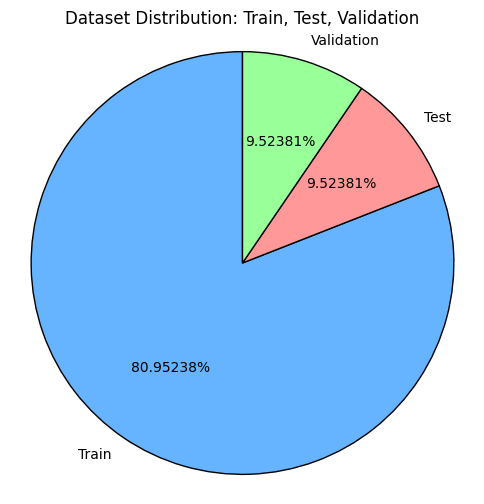


**Model structure** :

* 2 LSTM layers
* Hidden size : 512
* Sequence length : 10 frames
* Optimizer : Adam
* Loss : Custom L1 loss between predicted and actual keypoints
* Learning rate: 0.00002
* Epochs : 500
* Dropout : 10%
* Batch size : 10

I used an LSTM model with 2 layers. I chose 2 layers because using more layers made the model suffer from the vanishing gradient problem. Because the keypoints were already normalized using media pipe and it was in the range [1 , 0] , also with very small learning rate: 0.00002, it suffers from vanishing gradient. I also tested different hidden sizes and found that a hidden size of 512 gave the best results with low error. Also I added dropout to 0.1 which introduces 10% dropping in the neurons during training to generalize the model.



**HyperParametr tuning**
Initially I tried to use orion-tuning(introduced in tutorial 7)to tune the hyperparamters for this model. But as only 51 training videos were used, it was making the model overfitted to the trained dataset. Also for large number of epochs it was taking very long to go complete one set of hyperparameters. So I dropped the idea and instead manually did hypertune the parameters.

### Connect to google drive to get the datasets.

* link to the dataset: https://drive.google.com/drive/folders/1A_GDFtH0NEs93-ZnL9bgYy2xbfWsg4dJ?usp=sharing

* Also before running the code, please add the folder to your drive shotcuts, like this:
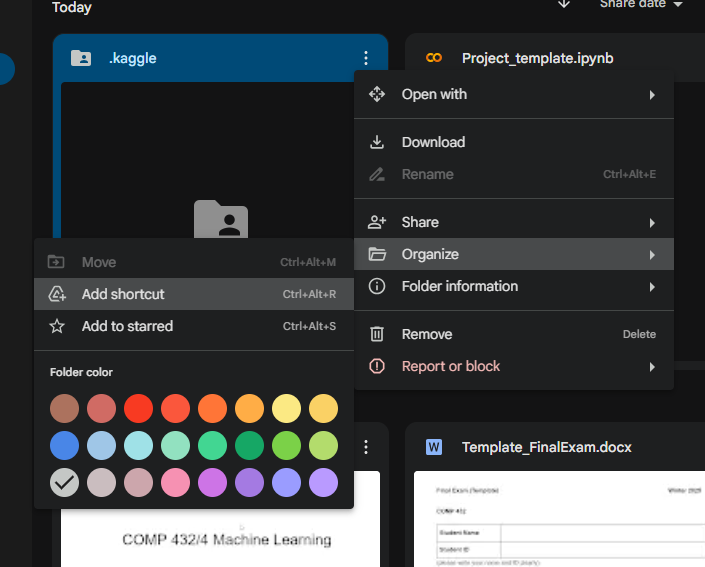

and then: add shotcut to my drive

image.png

* Code credit : https://colab.research.google.com/notebooks/io.ipynb , cell 3



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
## This should print: 'Mounted at /content/drive'

In [ ]:
# Folder
folder = ".kaggle/gym-workoutexercises-video"
folder_path = f"/content/drive/My Drive/{folder}"

print(f"Folder is mounted at: {folder_path}")

Check the folders in the directory to make sure it was connected
* Keeping the videos in 3 different folders is done to make sure there is no data leaking.

In [ ]:
print(os.listdir(folder_path))
# it should print: ['bench press', 'test set', 'validation set']

Now we can extract the dataset:


In [ ]:
train_folder = os.path.join(folder_path , "bench press")
test_folder = os.path.join(folder_path , "test set")
valid_folder = os.path.join(folder_path , "validation set")
# print(os.listdir(video_folder))

Examine a sample videos frame from each dataset:
- load video's code was inspired from open cv's documentation:
https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

In [ ]:
train_files = [os.path.join(train_folder , f) for f in os.listdir(train_folder) if f.endswith('.mp4')]
test_files = [os.path.join(test_folder , f) for f in os.listdir(test_folder) if f.endswith('.mp4')]
valid_files = [os.path.join(valid_folder , f) for f in os.listdir(valid_folder) if f.endswith('.mp4')]

# read a video
def load_video(video_path : str) -> list:
    """
    The function `load_video` reads frames from a video file and returns a list of frames.

    Args:
        video_path (str): The path to the video file.

    Returns:
        list: A list of frames read from the video.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    return frames


train_video_frames = load_video(train_files[8]) # a random video from Train Data
test_video_frames = load_video(test_files[1]) # a random video from test data
valid_video_frames = load_video(valid_files[1]) # a random video from validation data

print(f"Loaded {len(train_video_frames)} frames from {train_files[8]}")
print(f"Loaded {len(test_video_frames)} frames from {test_files[1]}")
print(f"Loaded {len(valid_video_frames)} frames from {valid_files[1]}")

See the percentage of the dataset:

In [ ]:
train_size = len(train_files)
test_size = len(test_files)
validation_size = len(valid_files)

# Calculate the total size of the dataset
total_size = train_size + test_size + validation_size

# Calculate the percentage for each set
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100
validation_percentage = (validation_size / total_size) * 100

# Plot the pie chart
labels = ['Train', 'Test', 'Validation']
sizes = [train_percentage, test_percentage, validation_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%2.5f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Dataset Distribution: Train, Test, Validation")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the plot
plt.show()

let's visualize the frame:

In [ ]:
train_frame_rgb = cv2.cvtColor(train_video_frames[11] , cv2.COLOR_BGR2RGB) ## randomly selected 11th frame
test_frame_rgb = cv2.cvtColor(test_video_frames[11] , cv2.COLOR_BGR2RGB) ## randomly selected 11th frame
valid_frame_rgb = cv2.cvtColor(valid_video_frames[11] , cv2.COLOR_BGR2RGB) ## randomly selected 11th frame

# Plot the frame
plt.imshow(train_frame_rgb)
plt.axis("off")
plt.title("Sample Frame from Video")
plt.show()

plt.imshow(test_frame_rgb)
plt.axis("off")
plt.title("Sample Frame from Test Video")
plt.show()

plt.imshow(valid_frame_rgb)
plt.axis("off")
plt.title("Sample Frame from Validation Video")
plt.show()

Let's extract the frame using media pipe:

In [ ]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def extract_keypoints(frame : np.ndarray) -> np.ndarray:
    """ The function `extract_keypoints` processes a frame to extract pose landmarks in RGB format.

    Args:
        frame (numpy.ndarray) : The input frame, typically a single frame of an image or video,
                                represented as an array of pixel values.

    Returns:
        numpy.ndarray : An array of 3D coordinates (x , y , z) for each detected pose landmark
                        in the input frame. If no pose landmarks are detected, it returns a
                        zero-filled array of shape (33 , 3).
    """
    frame_rgb = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        return np.array([[lm.x , lm.y , lm.z] for lm in results.pose_landmarks.landmark])
    else:
        return np.zeros((33 , 3))

train_keypoints = extract_keypoints(train_video_frames[0]) ## right now it has only 1 frames data
test_keypoints = extract_keypoints(test_video_frames[0])
valid_keypoints = extract_keypoints(valid_video_frames[0])

# should be shape (33 , 3)  which is 33 body land marks in x , y and z axis
print(train_keypoints.shape)
print(test_keypoints.shape)
print(valid_keypoints.shape)


Let's combine them and see how the frames look like:

In [ ]:
from typing import List
frame_with_keypoints = train_video_frames[0].copy()


def plot_keypoints_on_frame(frame : np.ndarray , keypoints : List , title : str = "Frame with Keypoints") -> None:
    """
    Draws keypoints on a single video frame and displays it.

    Args:
        frame (np.ndarray): The video frame (H, W, C).
        keypoints (List[Tuple[float, float, _]]): Normalized keypoints (x, y, _) for the frame.
        title (str): Title for the matplotlib plot.
    """
    frame_with_keypoints = frame.copy()

    height , width , _ = frame.shape
    for i , (x , y , _) in enumerate(keypoints):
        x_pixel = int(x * width)
        y_pixel = int(y * height)
        cv2.circle(frame_with_keypoints , (x_pixel , y_pixel) , 5 , (0 , 255 , 0) , -1)  # Green circle

    frame_rgb = cv2.cvtColor(frame_with_keypoints , cv2.COLOR_BGR2RGB)

    plt.imshow(frame_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_keypoints_on_frame(train_video_frames[0] , train_keypoints , title = "Train Frame with Keypoints")
plot_keypoints_on_frame(valid_video_frames[0] , valid_keypoints , title = "Validation Frame with Keypoints")
plot_keypoints_on_frame(test_video_frames[0] , test_keypoints , title = "Test Frame with Keypoints")


Let's scale it up and extract all the keypoints from the videos.

In [ ]:
def extract_keypoints_from_videos(video_paths: List) -> dict[str , np.ndarray]:
    """
    Extracts pose keypoints from a list of video files.

    Args:
        video_paths (List[str]): List of paths to video files.

    Returns:
        Dict[str, np.ndarray]: A dictionary mapping each video path to its extracted keypoints array
        of shape (num_frames , 33 , 3) , where each keypoint has (x , y , z) coordinates.
    """

    video_keypoints = {}

    for video_path in video_paths:
        cap = cv2.VideoCapture(video_path)
        keypoints_list = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            keypoints = extract_keypoints(frame)
            if keypoints is not None and not np.all(keypoints == 0):
                keypoints_list.append(keypoints)

        cap.release()

        if keypoints_list:
            video_keypoints[video_path] = np.array(keypoints_list)  # Shape (num_frames , 33 , 3)
            print(f"Extracted {video_keypoints[video_path].shape[0]} frames from {video_path}")
        else:
            print(f"No keypoints extracted for {video_path}")

    return video_keypoints

In [ ]:
train_video_keypoints = extract_keypoints_from_videos(train_files)
print("----------- test videos extracted ------------------------")
valid_video_keypoints = extract_keypoints_from_videos(valid_files)
print("----------- valid videos extracted ------------------------")
test_video_keypoints  = extract_keypoints_from_videos(test_files)
print("----------- test videos extracted ------------------------")

Let's convert and save them using numpy array:
* nupy array: easy to use for pytorch models specially when moving it across CPU and GPU RAMs.
* Save: saves a huge time just to load it, instead of extracting it again.

In [ ]:
# Convert to array of arrays
all_train_keypoints = np.array(list(train_video_keypoints.values()) , dtype = object)
all_valid_keypoints = np.array(list(valid_video_keypoints.values()) , dtype = object)
all_test_keypoints  = np.array(list(test_video_keypoints.values()) , dtype = object)

# Save them individually , so I can load them when needed next time
np.save("bench_press_train_keypoints.npy" , all_train_keypoints)
np.save("bench_press_valid_keypoints.npy" , all_valid_keypoints)
np.save("bench_press_test_keypoints.npy" ,  all_test_keypoints)

Final step before actually moving to the Training:
Make a video of the datasets, just to make sure, everything here worked so far and the datas are very well to actually start the training.
* pose_connections code was taken from media pipe documentation:
 https://github.com/google-ai-edge/mediapipe/blob/master/mediapipe/python/solutions/pose_connections.py

* just used upper body's keypoints, as we will use them in training.

In [ ]:
# Define connections between keypoints (Mediapipe Pose)
POSE_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 4),
    (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
    (5, 11), (6, 12),
    (11, 12),
    (11, 13), (13, 15), (12, 14), (14, 16)
]

# Function to create a video from keypoints
def create_keypoint_video(keypoints_sequence : list[list[tuple[float , float , float]]] , output_path : str , width : int = 640 , height : int = 480 , fps : int = 30) -> None:
    """
    Generates and saves a video visualizing a sequence of keypoints.

    Args:
        keypoints_sequence (List[List[Tuple[float, float, float]]]): Sequence of frames, each containing a list of keypoints with (x, y, confidence).
        output_path (str): Path to save the output video.
        width (int): Width of the output video in pixels.
        height (int): Height of the output video in pixels.
        fps (int): Frames per second for the output video.

    Returns:
        None
    """
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path , fourcc , fps , (width , height))

    for frame_keypoints in keypoints_sequence:
        frame = np.zeros((height , width , 3) , dtype = np.uint8)

        for x , y , conf in frame_keypoints:
            x = int(x * width)
            y = int(y * height)
            cv2.circle(frame , (x , y) , 5 , (0 , 255 , 0) , -1)

        for (start, end) in POSE_CONNECTIONS:
            x1 , y1 , _ = frame_keypoints[start]
            x2 , y2 , _ = frame_keypoints[end]

            x1 , y1 = int(x1 * width) , int(y1 * height)
            x2 , y2 = int(x2 * width) , int(y2 * height)

            cv2.line(frame , (x1 , y1) , (x2 , y2) , (255 , 0 , 0) , 2)

        out.write(frame)

    out.release()
    print(f"Saved : {output_path}")


# Train
if len(all_train_keypoints) > 0:
    create_keypoint_video(all_train_keypoints[4] , "train_keypoints_video.mp4")

# Validation
if len(all_valid_keypoints) > 0:
    create_keypoint_video(all_valid_keypoints[0] , "val_keypoints_video.mp4")

# Test
if len(all_test_keypoints) > 0:
    create_keypoint_video(all_test_keypoints[0] , "test_keypoints_video.mp4")

Sample Train GIF:
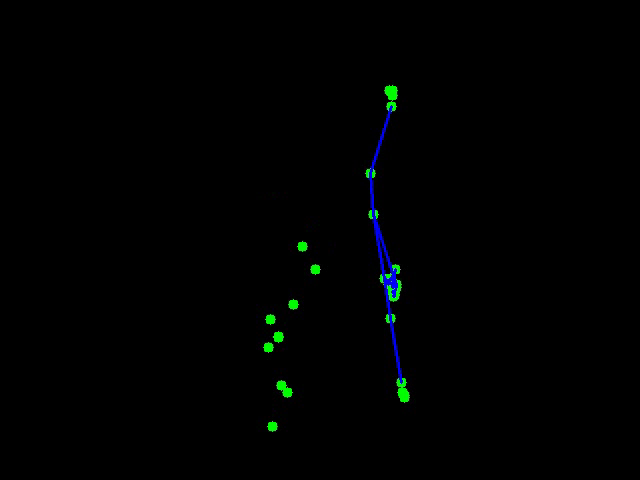

Sample Test GIF:
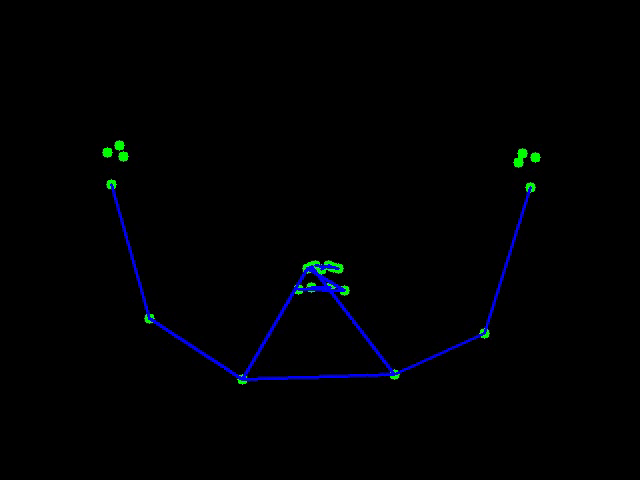

## **Experimental Results**


As everything verified, now actually define the model and start the training.

### Before defining the model, Just wanted to define my loss Class as my ML model will use it to penalizing the keypoints.
* I used L1 loss, summing up the errors. MSE could be a good loss but as I wanted to ignore the risk of vanishing gradient, summing them up made a good sense to me.
* Code idea was taken from:
https://discuss.pytorch.org/t/custom-loss-functions/29387/25

In [ ]:
class KeypointWiseLoss(nn.Module):
    """
    The `KeypointWiseLoss` class defines a custom L1 loss function for keypoint prediction tasks.

    Inherits:
        nn.Module: Base class for all neural network modules in PyTorch.

    Methods:
        forward(predicted, actual): Computes L1 loss between predicted and actual keypoints.
    """
    def __init__(self):
        """
          Initializes the KeypointWiseLoss module with L1 loss (sum reduction).
        """
        super(KeypointWiseLoss , self).__init__()
        self.l1_loss = nn.L1Loss(reduction = 'sum') ## I did not want to average as it could cause vanishing gradient

    def forward(self , predicted: torch.Tensor , actual : torch.Tensor) -> torch.Tensor:
        """
        Computes the L1 loss between predicted and actual keypoints.

        Args:
            predicted (torch.Tensor): Predicted keypoints tensor of shape (6 , 3).
            actual (torch.Tensor): Ground truth keypoints tensor of shape (6 , 3).

        Returns:
            torch.Tensor: Scalar tensor representing the total L1 loss.
        """
        predicted = predicted.view(-1 , 3)
        actual = actual.view(-1 , 3)

        loss = self.l1_loss(predicted , actual)

        return loss ### tweak // I could use mse, but as this is a deep neural network, mse may get vanished over time.

### The Model

* upper body indecis only include left wrist, left elbow, left shoulder, right shoulder , right elbow and right wrist.
* As bench press is only upper body exercise, we only focus on the upper body movements like how shoulder remains, how chest remains and if the arms are bending properly or not. So it makes very much sense to ignore the lower body points, also for upper body points, we can ignore thumb, pinky and index finger and face structure.
* code idea was taken from tutorial sessions


In [ ]:
class PoseLSTM(nn.Module):
    """
    The `PoseLSTM` class defines an LSTM-based neural network for pose estimation.

    It includes:
        - LSTM layer(s) to process sequential input data
        - Fully connected (fc) layer for final output mapping
        - Dropout for regularization

    Inherits:
        nn.Module: Base PyTorch module class
    """
    def __init__(self , input_size : int , hidden_size : int , num_layers : int , output_size : list , dropout : float = 0.1):
        """
        Initializes the PoseLSTM network.

        Args:
            input_size (int): Number of features in the input.
            hidden_size (int): Number of features in the hidden state.
            num_layers (int): Number of recurrent layers in the LSTM.
            output_size (int): Output feature size from the final linear layer.
            dropout (float , optional): Dropout rate for regularization. Defaults to 0.1.
        """
        super(PoseLSTM , self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size , hidden_size , num_layers , batch_first = True , dropout = dropout)
        self.fc = nn.Linear(hidden_size , output_size)
        self.dropout = nn.Dropout(p = dropout)

        self.upper_body_indices = [ # As I am only considering upper body points, except for fingers and face.
            11 , 12 , 13 , 14 ,  # Shoulders & Elbows
            15 , 16
        ]

    def forward(self , x : torch.Tensor) -> torch.Tensor:
        """_summary_
        The function `forward` processes the input tensor through an LSTM layer and a fully connected layer.
        It initializes hidden and cell states to zeros, processes the input through the LSTM, and then a
        pplies a fully connected layer to the last output of the LSTM.
        The output is the final prediction of the model and typically used in training and
        inference phases of the model.

        Args:
            x (_type_): _input tensor_

        Returns:
            _type_: _output tensor_
        """
        h0 = torch.zeros(self.num_layers , x.size(0) , self.hidden_size , device = x.device)
        c0 = torch.zeros(self.num_layers , x.size(0) , self.hidden_size , device = x.device)

        out , _ = self.lstm(x , (h0 , c0))
        out = self.fc(out[: , -1 , :])
        return out

Now Need a Class which does Validation check against the validation set.
* Same loss for Validation , eg. L1 loss, sum them up.
* And finally shown an average loss, this time only printed, but not really done averaging it.

In [ ]:
def validate_model(model : nn.Module , keypoints_list : list , criterion : nn.Module , seq_length : int , input_size : int , device : torch.device):
    """
    Validates the LSTM model on a list of keypoint sequences.

    This function slices each video into input-output pairs, filters out invalid sequences,
    performs inference using the model, and computes the average L1 loss per video.

    Args:
        model (nn.Module): Trained pose estimation model to evaluate.
        keypoints_list (list of np.ndarray): List where each element is an array of shape
            (num_frames, 33, 3) containing keypoints for one video.
        criterion (nn.Module): Loss function (e.g., L1 or MSE loss).
        seq_length (int): Number of frames in each input sequence to the LSTM.
        input_size (int): Flattened input size per frame (e.g., 6 joints × 3 coordinates = 18).
        device (torch.device): Device to perform computation on (CPU or CUDA).

    Returns:
        float or None: Average validation loss across all videos, or None if no valid sequences.
    """
    model.eval()
    video_losses = []  # Store losses for each video

    with torch.no_grad():
        for video_idx, video_keypoints in enumerate(keypoints_list):
            data = torch.tensor(video_keypoints[: , upper_body_indices].reshape(-1 , input_size) , dtype = torch.float32 ,
                                device = device)
            sequences = []
            targets = []

            for i in range(data.shape[0] - seq_length):
                seq_input = data[i : i + seq_length].unsqueeze(0).to(device)
                if torch.any(seq_input == 0):
                    continue
                target = data[i + seq_length]
                sequences.append(seq_input)
                targets.append(target)

            if len(sequences) == 0:
                print(f"Skipping video {video_idx} due to no valid sequences.")
                continue

            x_batch = torch.stack(sequences).to(device)[: , 0]
            y_batch = torch.stack(targets).to(device)

            output = model(x_batch)
            loss = criterion(output, y_batch)

            # Calculate average loss for this video
            video_loss = loss.item() / (data.shape[0] - seq_length)
            video_losses.append(video_loss)

            # Print loss for this video
            print(f"Validation Video {video_idx + 1} , Loss: {video_loss:.6f}")

    # Return the average loss per video
    return sum(video_losses) / len(video_losses) if video_losses else None

While trainig, I wanted to visualize the frame what the model is being trained on, so let's define a function which shows us the plots of the prediction and actual keypoints.

This would help a lot to verify.
* Note I would only plot the 11th frame of the video in trainig time. Because the model is being trained on from 11 to the last frame of the video using a sliding window, it would make plotting all the frames for each video would make it more confusing what is coming from which video and also slow down the training for unnecessary plots.

In [ ]:
def plot_skeleton(keypoints : np.ndarray , color : str = 'b' , label : str = None) -> None:
    """
    Plots a skeleton by drawing keypoints and connecting lines between them.

    Args:
        keypoints (np.ndarray): Array of keypoints with shape (num_keypoints, 3), containing (x, y, confidence).
        color (str, optional): Color used for keypoints and connecting lines. Defaults to 'b'.
        label (Optional[str], optional): Label for the keypoints plot. Defaults to None.

    Returns:
        None
    """
    keypoints = keypoints.reshape(-1 , 3)  # Reshape to (num_keypoints , 3)

    plt.scatter(keypoints[: , 0], keypoints[: , 1], c = color, label = label)  # Plot keypoints

    for (p1 , p2) in connections:
        if p1 in upper_body_indices and p2 in upper_body_indices:
            idx1 = upper_body_indices.index(p1)
            idx2 = upper_body_indices.index(p2)
            plt.plot([keypoints[idx1 , 0], keypoints[idx2 , 0]],
                     [keypoints[idx1 , 1], keypoints[idx2 , 1]],
                     color=color , linewidth = 2)

connections, like shoulder to wrist, wrist to elbow , etc. etc.
* body landmarks idea was taken from:
https://github.com/google-ai-edge/mediapipe/blob/master/docs/solutions/pose.md

In [ ]:
connections = [
    (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21),  # Left upper body
    (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),  # Right upper body
]

upper_body_indices = [
    11, 12, 13, 14,
    15, 16
]

#### Use GPU if available:

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

### Creating an instance of the model with the hyper parameters:

* with such low learning rate, epoch number had to be higher. However, it could prone to overfit, but we will do early stopping the train loop to prevent from overfitting.

Experiments with differnet sets of hyper parametsrs:MixCollage-20-Apr-2025-10-08-PM-4971.jpg

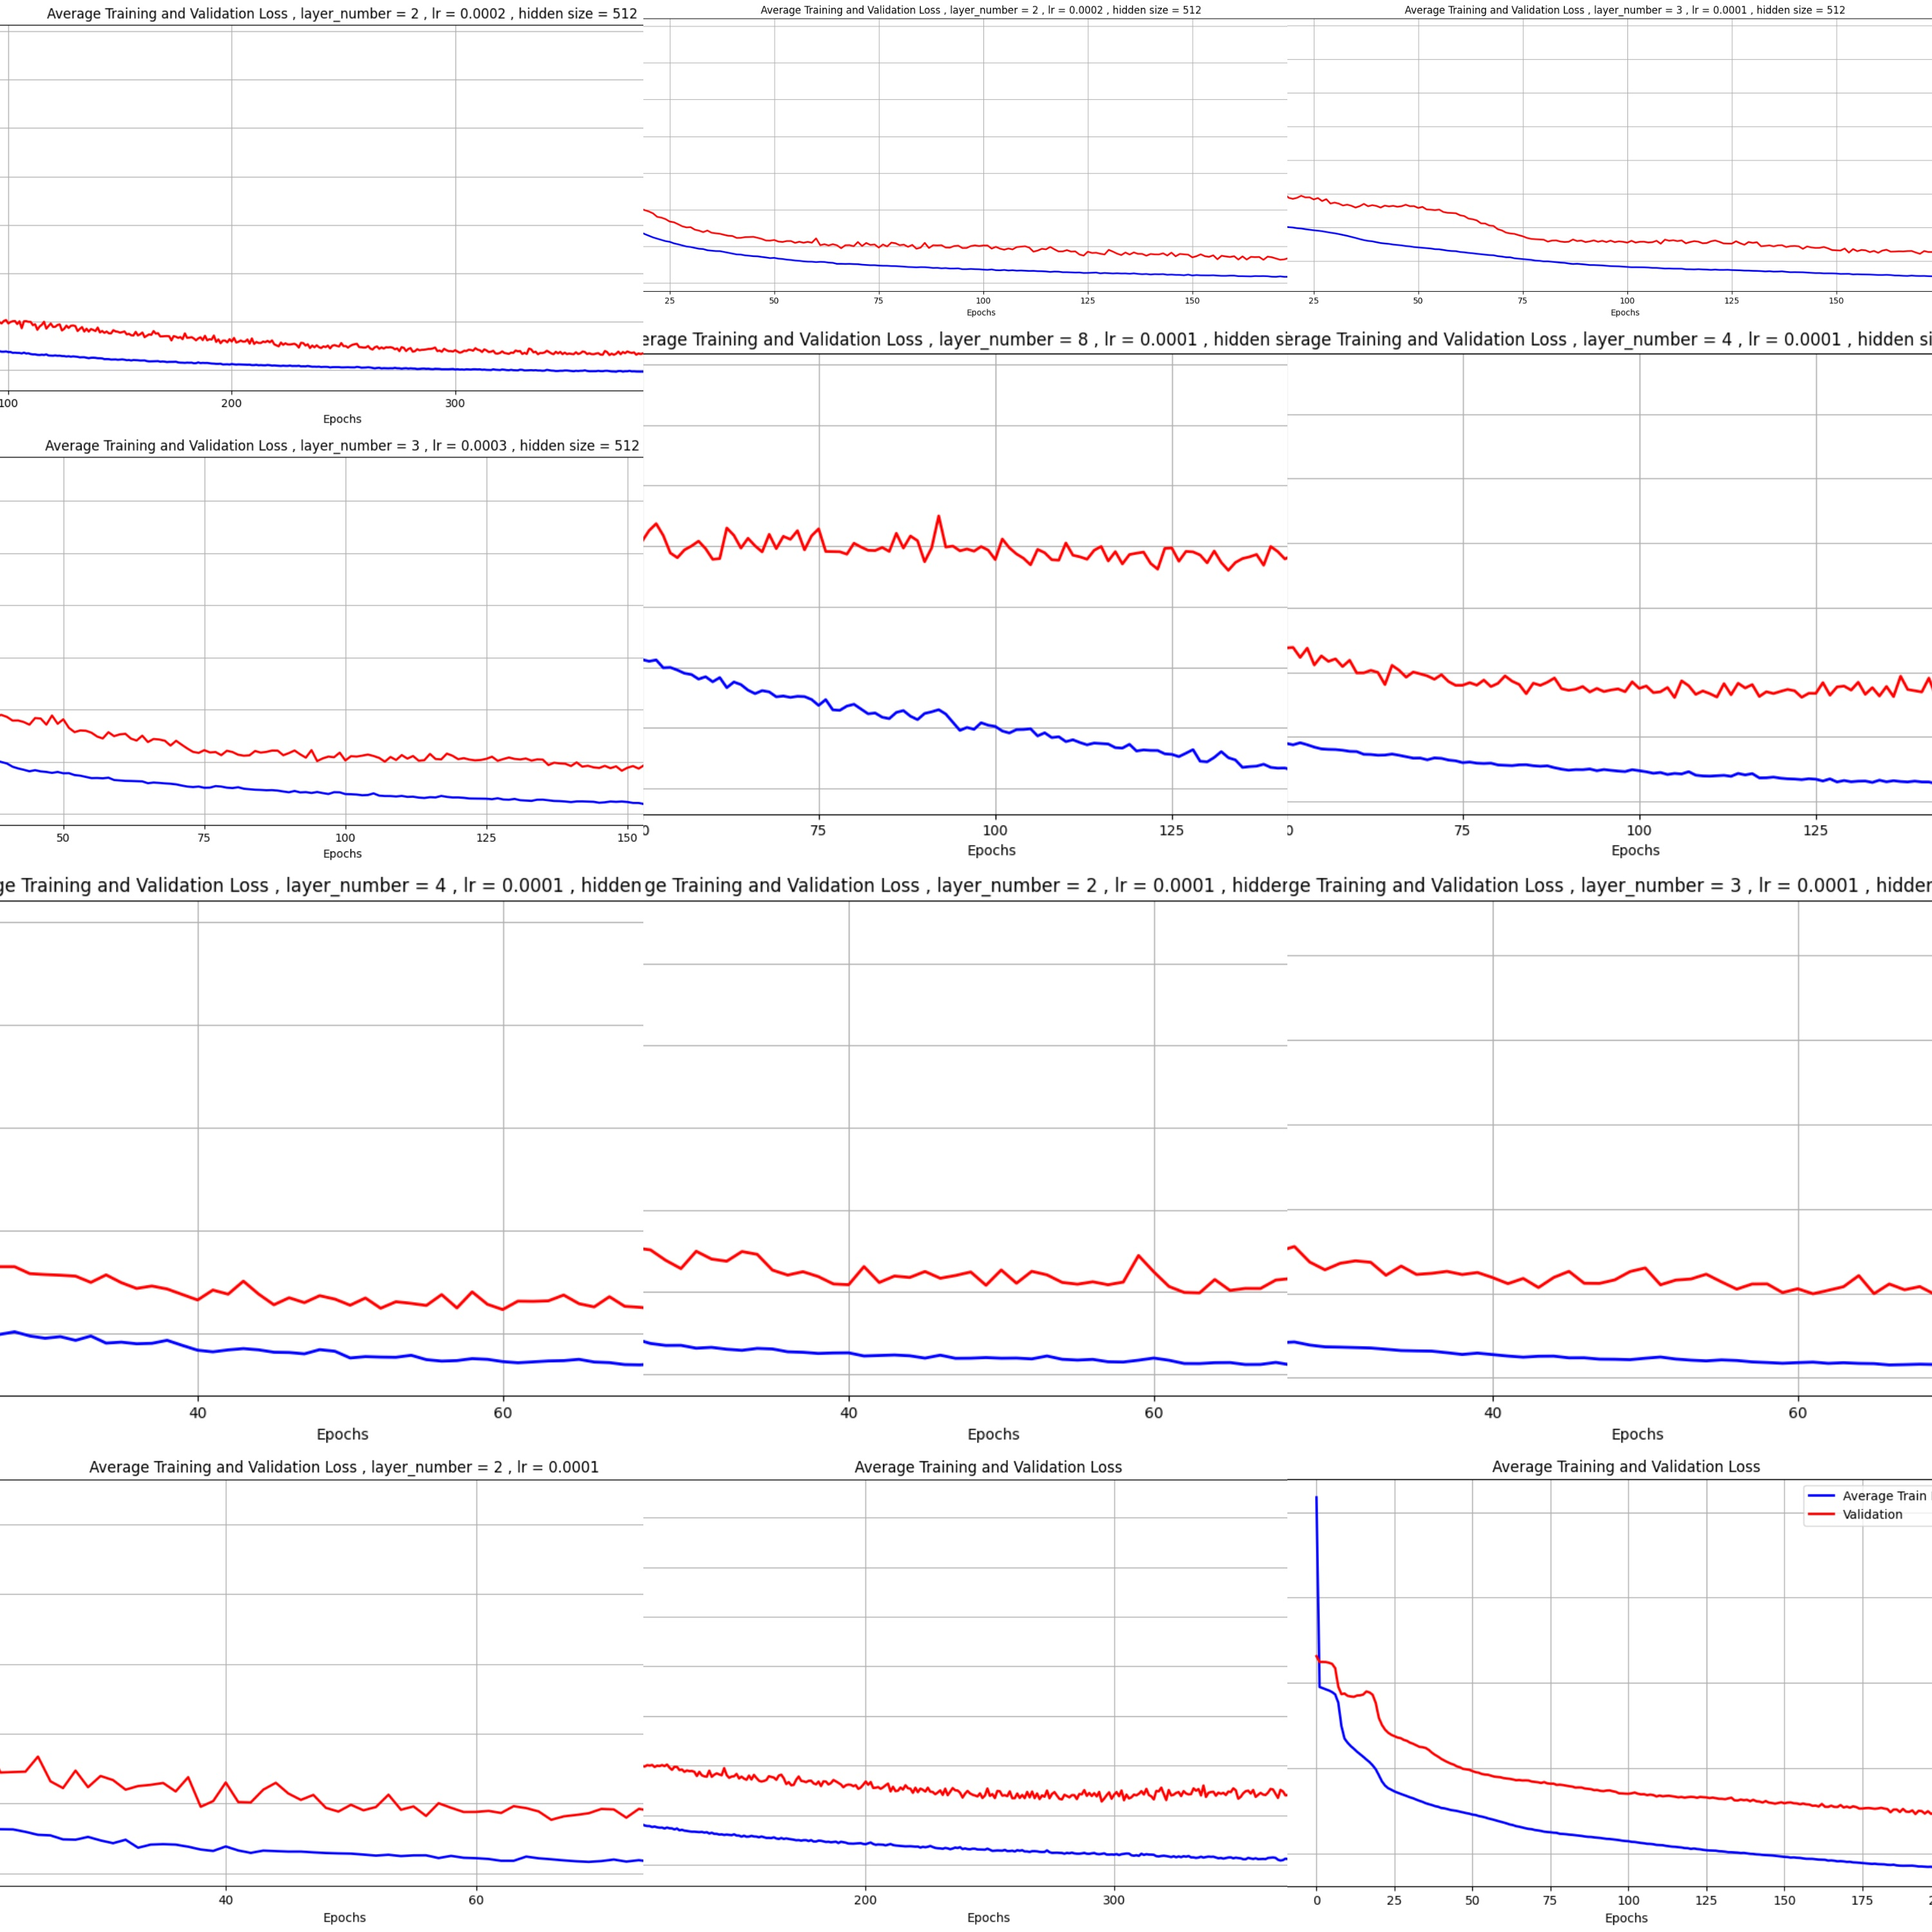

In [ ]:
num_keypoints = 33

input_size = len(upper_body_indices) * 3
hidden_size = 512
num_layers = 2 # decreasing the layer number gives much more accuracy on both train and validation but low on test...
output_size = input_size



criterion = KeypointWiseLoss()

seq_length = 10  # Number of frames to consider for prediction
num_epochs = 500 # Much number of epuchs, but We will introduce early stopping to prevent the model from being overfitted
batch_size = 10

model = PoseLSTM(input_size, hidden_size, num_layers, output_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00002)
print(model)

### Finally actually trainig loop:
* It will plot actual vs predicted plot after each 50 epochs.
* The plot is for the 11th frame only. to keep the code conseive.

In [ ]:
# Lists to store training and validation losses
train_losses = []
valid_losses = []

## for Early stopping
best_val_loss = float('inf')
patience = 40 # see 40 epochs before early stoping
counter = 0
best_model_state = None


for epoch in range(num_epochs):
    epoch_train_losses = []  # Store training losses for this epoch
    for video_idx, video_keypoints in enumerate(all_train_keypoints):
        total_loss = 0.0
        data = torch.tensor(video_keypoints[: , upper_body_indices].reshape(-1 , input_size) ,
                            dtype = torch.float32 , device = device)  # Convert to tensor

        sequences = [] ##
        targets = [] ##

        for i in range(data.shape[0] - seq_length):

            seq_input = data[i : (i + seq_length)].unsqueeze(0).to(device)  # Shape: (1, 10, 36)

            if torch.any(seq_input == 0):  # Check if all frames in the sequence are zeros
                print("SEQ SKIPPED in vid_idx ", video_idx)
                continue  # Skip this sequence

            target = data[i + seq_length].to(device)  # Shape: (36)
            # print(seq_input.shape)
            # plot_skeleton(target.cpu().numpy(), color='g', label='Actual') # just for checking
            # plt.show()
            sequences.append(seq_input) ##
            targets.append(target) ##

        if len(sequences) == 0:
            print(f"Skipping video {video_idx} due to no valid sequences.")
            continue  # Skip this video

        seq_batch = torch.stack(sequences).to(device)[: , 0]     ### Shape: (batch_size, seq_len, input_size)
        target_batch = torch.stack(targets).to(device)    ### Shape: (batch_size, input_size)

        for b_start in range( 0 , len(seq_batch) , batch_size): ####
            b_end = b_start + batch_size
            x_batch = seq_batch[b_start : b_end]
            y_batch = target_batch[b_start : b_end]

            model.train()

            optimizer.zero_grad()
            output = model(x_batch)  # Shape : (1, 36)
            # pritn("output.shape: " , output.shape)
            loss = criterion(output , y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        epoch_train_losses.append(total_loss / (data.shape[0] - seq_length))

        if ((epoch + 1) % 50) == 0:
          model.eval()
          plt.figure(figsize=(5 , 6))
          plt.gca().invert_yaxis()  # Invert y-axis for correct visualization

          with torch.no_grad():
              pred = model(x_batch[0].unsqueeze(0)).squeeze(0)  # Predicted keypoints

          plot_skeleton(y_batch[0].cpu().numpy() , color = 'g' , label = 'Actual')  # Green for actual
          plot_skeleton(pred.cpu().numpy() , color = 'r' , label = 'Predicted')  # Red for predicted

          plt.legend()
          plt.title(f'Epoch {epoch + 1} - Pose Prediction vs. Actual')
          plt.show()

        print(f"Video [{video_idx + 1} / {len(all_train_keypoints)}] Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / (data.shape[0] - seq_length):.6f}")

    # Store training loss for this epoch
    train_losses.append(epoch_train_losses)

    # Validation after each epoch
    valid_loss = validate_model(model , all_valid_keypoints , criterion , seq_length , input_size , device)
    valid_losses.append(valid_loss)  # Append average validation loss per video
    print(f"Epoch [{epoch + 1}/{num_epochs}], Average Validation Loss per Video: {valid_loss:.6f}")

    # Early Stopping Check
    if valid_loss < best_val_loss:
        best_val_loss = valid_loss
        best_model_state = model.state_dict()
        counter = 0 # Restart the counter agiain
        # print(f"So far :  {valid_loss:.6f}")

    else:
        counter += 1

    if counter >= patience:
        print("Early stopping triggered , BREAKING training loop")
        break


### Now set the best parameters to the model:

In [ ]:
if best_model_state:
    model.load_state_dict(best_model_state)
    print("Best model weights restored.")

### Save the model:

In [ ]:
torch.save(model , "pose_lstm_full.pth")

### Plot the test loss and validation loss:


In [ ]:
plt.figure(figsize=(20, 6))


avg_train_losses = [np.mean(epoch_losses) for epoch_losses in train_losses]
plt.plot(avg_train_losses, label="Average Train Loss", linewidth=2, color="blue")


plt.plot(valid_losses, label="Average Validation Loss", linewidth=2, color="red")


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Average Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

### Test against the test set.
Finally we are good to test our model. How accurate it is.
* Defined another function for test_loss, very similar to validation loss, but still different.

In [ ]:
def test_model(model : nn.Module , keypoints_list : list , criterion : nn.Module , seq_length : int , input_size : int , device : torch.device) -> tuple :
    """
    Evaluates the trained pose estimation model on a test dataset and visualizes predictions.

    This function computes the loss for each video in the test set, stores predictions,
    and plots both numerical and visual comparisons of actual vs predicted keypoints.

    Args:
        model (nn.Module): Trained PyTorch LSTM model for pose prediction.
        keypoints_list (list of np.ndarray): List of keypoint arrays per video (shape: [frames, 33, 3]).
        criterion (nn.Module): Loss function (e.g., L1Loss or MSELoss).
        seq_length (int): Length of input sequence window to feed the LSTM.
        input_size (int): Flattened size of input per frame (e.g., 6 joints × 3 coords = 18).
        device (torch.device): Device to run inference on (e.g., 'cuda' or 'cpu').

    Returns:
        tuple:
            - avg_loss (float or None): Average test loss across all videos.
            - predictions (list): List of tuples (x_batch, y_batch, output) for each video.
    """

    model.eval()
    video_losses = []
    predictions = []

    with torch.no_grad():
        for video_idx, video_keypoints in enumerate(keypoints_list):
            data = torch.tensor(video_keypoints[:, upper_body_indices].reshape(-1, input_size), dtype=torch.float32, device=device)
            sequences = []
            targets = []

            for i in range(data.shape[0] - seq_length):
                seq_input = data[i:i + seq_length].unsqueeze(0).to(device)
                if torch.any(seq_input == 0):
                    continue
                target = data[i + seq_length]
                sequences.append(seq_input)
                targets.append(target)

            if len(sequences) == 0:
                print(f"Skipping video {video_idx} due to no valid sequences.")
                continue

            x_batch = torch.stack(sequences).to(device)[:, 0]
            y_batch = torch.stack(targets).to(device)

            output = model(x_batch)
            loss = criterion(output, y_batch)

            video_loss = loss.item() / (data.shape[0] - seq_length)
            video_losses.append(video_loss)

            print(f"Test Video {video_idx + 1}, Loss: {video_loss:.6f}")

            predictions.append((x_batch, y_batch, output))

            plt.figure(figsize=(5, 6))
            plt.gca().invert_yaxis()
            plot_skeleton(y_batch[0].cpu().numpy(), color='g', label='Actual')
            plot_skeleton(output[0].cpu().numpy(), color='r', label='Predicted')
            plt.legend()
            plt.title(f'Test Video {video_idx + 1} - Pose Prediction vs. Actual')
            plt.show()

    plt.figure()
    plt.plot(range(1, len(video_losses) + 1), video_losses, marker='o', color='blue')
    plt.title("Test Loss per Video lr = 0.0002 , num_layer = 2 , hidden size = 512")
    plt.xlabel("Video Index")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    avg_loss = sum(video_losses) / len(video_losses) if video_losses else None
    return avg_loss, predictions

test_loss, test_predictions = test_model(model, all_test_keypoints, criterion, seq_length, input_size, device)
print(f"Average Test Loss per video : {test_loss}")

**Very High Error or video 4?**
it is due to the person's hands went off the frame. I found the issue, very lately and could not change the video. However for other videos, the errors are very minimal as we can see on the graph.

*the frame where things going horribly wrong , beyond the understanding of the model*:
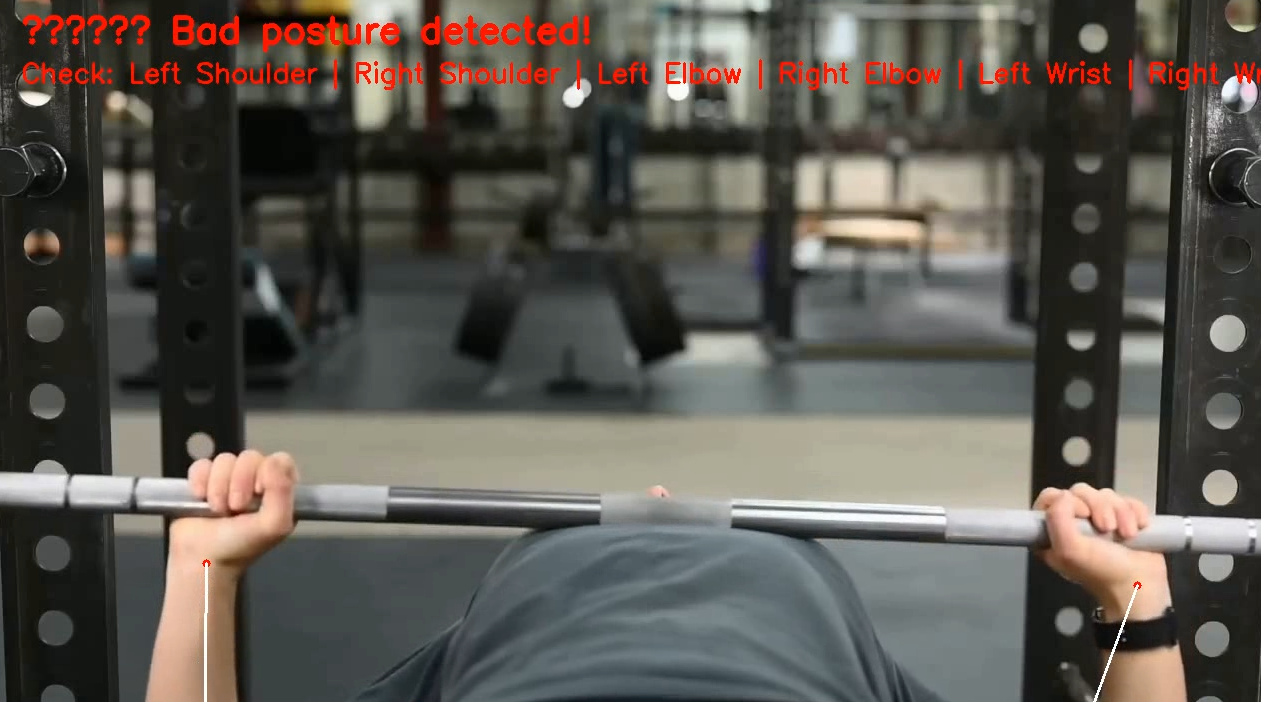

### Finally let's apply this in real life:
* this code was written mostly using Gemini, that comes with Colab Envirnment.
* Given prompt was :

"Now I wanted to visualize the errors on actual vides. for 1 frame prediction on a video, it would be very hard for a user to actually notice it.

so what I wanted to do:

take like 15 frames, and then for the next consequtive 5 frames, if the person is making mistake, warn him where he broke the pose for the next few frames. also make a threshold to 0.09, if any any point differ more than that, signal the error. Finally save the video.."

* However, I did manual checking and changed some codes manually.

In [ ]:
joint_names = {
    11: "Left Shoulder",
    12: "Right Shoulder",
    13: "Left Elbow",
    14: "Right Elbow",
    15: "Left Wrist",
    16: "Right Wrist"
}


def draw_pose(image, keypoints, warning=False, bad_joints=None):
    h, w, _ = image.shape
    for idx in range(len(keypoints)):
        i = upper_body_indices[idx]
        x, y, _ = keypoints[idx]
        cx, cy = int(x * w), int(y * h)
        if bad_joints is not None and idx in bad_joints:
            color = (0, 0, 255)  # red for bad joint
        else:
            color = (0, 255, 0) if warning else (255, 255, 255)
        cv2.circle(image, (cx, cy), 4, color, -1)

    mapped_connections = [tuple(upper_body_indices.index(x) for x in conn) for conn in connections if all(x in upper_body_indices for x in conn)]
    for a, b in mapped_connections:
        if keypoints[a][2] > 0.1 and keypoints[b][2] > 0.1:
            ax, ay = int(keypoints[a][0] * w), int(keypoints[a][1] * h)
            bx, by = int(keypoints[b][0] * w), int(keypoints[b][1] * h)
            cv2.line(image, (ax, ay), (bx, by), (255, 255, 255), 2)
    return image

def extract_keypoints_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    keypoint_sequences = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = pose.process(image_rgb)

        if result.pose_landmarks:
            kp = result.pose_landmarks.landmark
            keypoints = np.array([[l.x, l.y, l.z] for l in kp])
        else:
            keypoints = np.zeros((33, 3))

        frames.append(frame)
        keypoint_sequences.append(keypoints)

    cap.release()
    return np.array(frames), np.array(keypoint_sequences)

def is_pose_broken(true_kp, pred_kp, threshold=0.09):
    diffs = np.abs(true_kp - pred_kp)
    joint_errors = np.mean(diffs, axis=1)  # (6,)
    bad_joint_indices = [i for i, err in enumerate(joint_errors) if err > threshold]
    return len(bad_joint_indices) > 0, bad_joint_indices


def run_and_draw(video_path, output_path):
    frames, keypoints = extract_keypoints_from_video(video_path)
    output_frames = []
    warn_frames = np.zeros(len(frames), dtype=bool)
    bad_joint_indices_per_frame = [None] * len(frames)

    # Select only upper body keypoints before flattening
    keypoints = keypoints[:, upper_body_indices, :]  # shape: (N, 6, 3)

    # Flatten for input to model: shape becomes (N, 18)
    flat_kp = keypoints.reshape(len(keypoints), -1)

    for i in range(0, len(frames) - 25):
        input_seq = flat_kp[i:i + 20]
        input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0).to(device)

        preds = []
        for j in range(5):  # Predict next 5 frames
            with torch.no_grad():
                pred = model(input_tensor)[0]  # shape: (18,)
            preds.append(pred.cpu().numpy())
            # Slide window forward
            input_seq = np.vstack((input_seq[1:], pred.cpu().numpy()))
            input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0).to(device)

        preds = np.array(preds).reshape(5, 6, 3)
        true_next = keypoints[i + 15:i + 20]

        broken_count = 0
        frame_bad_joints = set()

        for pred_kp, true_kp in zip(preds, true_next):
            is_broken, bad_joints = is_pose_broken(true_kp, pred_kp)
            if is_broken:
                broken_count += 1
                frame_bad_joints.update(bad_joints)

        if broken_count >= 3:
            warn_frames[i + 20:i + 35] = True  # Warn for next 15 frames
            bad_joint_indices_per_frame[i + 25] = list(frame_bad_joints)

    for i, (frame, kp) in enumerate(zip(frames, keypoints)):
        warning = warn_frames[i]
        bad_joints = bad_joint_indices_per_frame[i]
        frame = draw_pose(frame.copy(), kp, warning=warning, bad_joints=bad_joints)
        if warning:
            cv2.putText(frame, "Bad posture detected!", (30, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
            if bad_joints:
                joint_texts = [joint_names[upper_body_indices[j]] for j in bad_joints if j < len(upper_body_indices)]
                msg = " | ".join(joint_texts)
                cv2.putText(frame, f"Check: {msg}", (30, 90),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
        output_frames.append(frame)

    h, w, _ = output_frames[0].shape
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (w, h))
    for f in output_frames:
        out.write(f)
    out.release()

run_and_draw(test_files[0], "output_predicted_video.mp4")
run_and_draw(test_files[3], "output_predicted_video2.mp4")
run_and_draw(valid_files[1], "output_predicted_video3.mp4")

### Let's visualize the model to see what happened:

* This cell may try to restart the session. PLEASE DO NOT RESTART, we can ignore the warning and run the next cell.

In [ ]:
!pip install torchviz

from torchviz import make_dot
from IPython.display import Image

from torchviz import make_dot

In [ ]:
dummy_input = torch.randn(batch_size , seq_length, input_size).to(device)  # Batch size of 1, sequence length of 10, input size as defined

output = model(dummy_input)

dot = make_dot(output, params=dict(model.named_parameters()))


dot.render("pose_lstm_model", format="png")
Image(filename="pose_lstm_model.png")

## **Conclusions**

Through this project, I showed that a machine learning model can be trained to give real-time feedback on exercise form using pose keypoints. The LSTM model was able to learn the motion patterns of the bench press and could detect incorrect posture with good accuracy. The system worked well with videos from different angles and gave fast and clear feedback.

Overall, this was a good starting point to explore how machine learning can help people exercise safely and effectively at home or in the gym. I learned the best machine learning practice throught the project. One thing I would like to highlight is the number of layers and how vanishing gradient can impact the learning. As the keypoints are normalized between [0 , 1], I had to choose a very small learning rate which is 0.00002. with such small learning rate, if this goes through many layers, the model learns nothing. Instead adding more neurons to  the layers helped me. And I also added dropout rate to 10%. But if everything is so small, to actually improve the model I had to use large epoch number. However this could make the model overfitted to the training data. so I had introduced early stopping, if the models accuracy is not improving over 40 epochs. And keep track of the best parameters against the validation set. When epochs are finished, best parameters amongst the epcohs are added to the model.

However, this model is specific to the bench press. It does not generalize to other exercises. It also depends heavily on the video quality. Future improvements can include collect more train data and augment the dataset.


Finally a LSTM pose model is ready to correct the pose for bench press exercise. The training dataset includes videos from many different angles for the model. During the train time the model almost saw all possible angles to perform a bench press and is ready to assist a user on the exercise. But if it is used against another different exercise, this would fail terribly. Also if the user's hands or any body part goes out of the frame, the model will make wrong predictions.

## **References**

[Dataset](https://www.kaggle.com/datasets/philosopher0808/gym-workoutexercises-video)

[Another Project for classification](https://github.com/zczcwh/PoseFormer)

[How to mount google Drive](https://colab.research.google.com/notebooks/io.ipynb)

[How to capture video using media pipe](https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html)

[pose connections](https://github.com/google-ai-edge/mediapipe/blob/master/mediapipe/python/solutions/pose_connections.py)

[Custom loss function](https://discuss.pytorch.org/t/custom-loss-functions/29387/25)

[Media Pipe body landmarks](https://github.com/google-ai-edge/mediapipe/blob/master/docs/solutions/pose.md)
